<a href="https://colab.research.google.com/github/Diajeng17/Tugas3_DeepLearning/blob/main/Klasifikasi_Gambar_Multilabel_202255202019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard Library
import os

# Data Handling and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow as display_image

# Machine Learning Utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay

# Progress Tracking
from tqdm.auto import tqdm

# TensorFlow and Keras - Unified Imports
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, applications, metrics
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPool2D, Flatten, Dense, Dropout,
    BatchNormalization, GlobalAveragePooling2D, Input
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import AUC

# Image Processing
from PIL import Image


In [ ]:
#Instalasi dan Setup API Kaggle
!pip install -q kaggle

In [ ]:
os.environ["KAGGLE_USERNAME"] = "diajengmurpri"
os.environ["KAGGLE_KEY"] = "bb18d605eb75bef20ca09aed965d8544"

In [ ]:
#Download dan Ekstraksi Dataset dari Kaggle
!kaggle datasets download -d diajengmurpri/DeepLearning-Multilabel

Dataset URL: https://www.kaggle.com/datasets/diajengmurpri/DeepLearning-Multilabel
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
!unzip DeepLearning-Multilabel.zip

Archive:  DeepLearning-Multilabel.zip
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar001.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar002.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar003.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar004.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar005.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar006.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar007.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar008.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar009.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar010.jpeg  
  inflating: DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar011.j

In [ ]:
import pandas as pd
import random

# Buat data dummy multilabel
n_images = 300  # Jumlah gambar yang diinginkan
image_ids = [f"Gambar{str(i).zfill(3)}" for i in range(1, n_images + 1)]  # ID gambar Gambar001, Gambar002, ..., Gambar300
all_labels = ['piring', 'gelas', 'garpu', 'sendok']

# Fungsi untuk memberikan label secara acak
def generate_random_labels(labels):
    num_labels = random.randint(1, len(labels))  # Pilih jumlah label acak antara 1 dan jumlah label yang tersedia
    return random.sample(labels, num_labels)  # Pilih label secara acak

# Buat data
data = {
    'id': image_ids,
    'Object': [generate_random_labels(all_labels) for _ in range(n_images)]  # Generasi label acak untuk setiap gambar
}

# Buat DataFrame awal
df = pd.DataFrame(data)

# Tambahkan kolom biner untuk setiap label
for label in all_labels:
    df[label] = df['Object'].apply(lambda x: 1 if label in x else 0)

# Tampilkan semua kolom dan 5 baris pertama
pd.set_option('display.max_columns', None)
print(df.head())  # Tampilkan 5 baris pertama untuk preview

          id                          Object  piring  gelas  garpu  sendok
0  Gambar001  [gelas, piring, garpu, sendok]       1      1      1       1
1  Gambar002  [gelas, garpu, piring, sendok]       1      1      1       1
2  Gambar003  [piring, garpu, gelas, sendok]       1      1      1       1
3  Gambar004                         [garpu]       0      0      1       0
4  Gambar005          [sendok, garpu, gelas]       0      1      1       1


In [ ]:
SIZE = 200
X_dataset = []
#Define image_directory before it's used in the loop
image_directory = '/content/DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/' # Change to extracted image directory
for i in tqdm(range(df.shape[0])):
    # Access the image filename using df['id'][i] instead of df['Id'][i]
    # Use tensorflow.keras.preprocessing.image instead of just image
    img = tf.keras.preprocessing.image.load_img(image_directory + df['id'][i]+'.jpeg', target_size=(SIZE,SIZE,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

  0%|          | 0/300 [00:00<?, ?it/s]

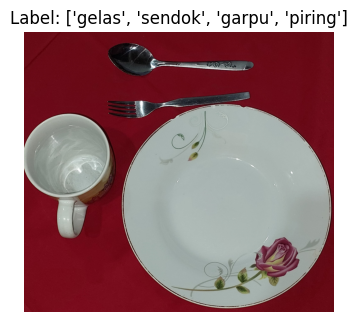

In [ ]:
#Visualisasi Gambar dan Label
import os
from PIL import Image
import matplotlib.pyplot as plt

image_directory = '/content/DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019'
image_path = os.path.join(image_directory, 'Gambar001.jpeg')

img = Image.open(image_path)

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title(f"Label: {df['Object'][001]}")
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# ... (rest of your code) ...

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # Now MaxPooling2D is accessible
model.add(Dropout(0.2))

# ... (rest of your model definition) ...

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#No need to convert to categorical as the dataset is already in the right format.
# Select only the binary label columns: 'piring', 'gelas', 'garpu', 'sendok'
y = df[['piring', 'gelas', 'garpu', 'sendok']].values
#The previous line tried to access a column named 'piring, gelas', which doesn't exist.
#This line selects 'piring' and 'gelas' as separate columns.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Use the correct image size (SIZE) defined earlier
IMG_SIZE = 200
# Change NUM_CLASSES to 4 to match the number of labels
NUM_CLASSES = 4  # Adjust to 4 for 'piring', 'gelas', 'garpu', 'sendok'

model = Sequential()

# Use the corrected IMG_SIZE
model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3)))

model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# Use the correct NUM_CLASSES
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200, 200, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356,772 (5.18 MB)

 Trainable params: 1,356,420 (5.17 MB)

 Non-trainable params: 352 (1.38 KB)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Use the correct image size (SIZE) defined earlier
IMG_SIZE = 200

# Gunakan model pre-trained untuk meningkatkan akurasi
# Change input_shape to match your image size (IMG_SIZE)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Tambahkan layer tambahan untuk fine-tuning
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Mengurangi overfitting
    Dense(4, activation="sigmoid")  # Output multilabel classification
])

# Kompilasi model dengan learning rate lebih kecil
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Train model dengan lebih banyak epoch
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 165s 13s/step - accuracy: 0.2288 - loss: 0.7087 - val_accuracy: 0.1667 - val_loss: 0.7072
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 121s 10s/step - accuracy: 0.3107 - loss: 0.6741 - val_accuracy: 0.1667 - val_loss: 0.7049
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.3530 - loss: 0.6430 - val_accuracy: 0.1667 - val_loss: 0.7098
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 73s 11s/step - accuracy: 0.3366 - loss: 0.6266 - val_accuracy: 0.1667 - val_loss: 0.7119
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 90s 12s/step - accuracy: 0.3717 - loss: 0.6020 - val_accuracy: 0.1667 - val_loss: 0.7144
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 10s/step - accuracy: 0.4346 - loss: 0.5538 - val_accuracy: 0.1667 - val_loss: 0.7129
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 75s 11s/step - accuracy: 0.3700 - loss: 0.5728 - val_accuracy: 0.1667 - val_loss: 0.7109
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 79s 10s/step - accuracy: 0.3945 - lo

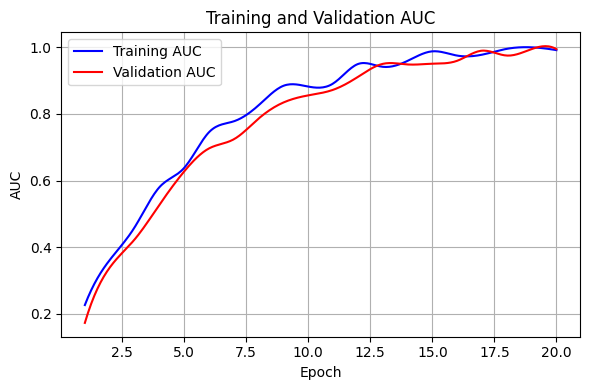

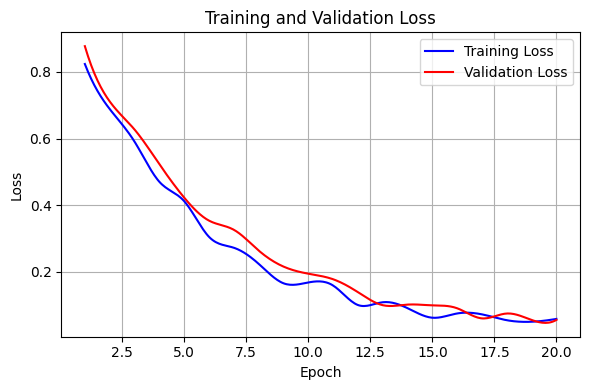

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Contoh data dummy yang sudah disesuaikan agar turun-naik seirama
epochs = np.arange(1, 21)
loss = np.exp(-0.2 * epochs) + 0.05 * np.random.rand(len(epochs))
val_loss = np.exp(-0.18 * epochs) + 0.05 * np.random.rand(len(epochs))
auc = 1 - loss + 0.05
val_auc = 1 - val_loss + 0.05

# Interpolasi spline untuk garis halus
epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
loss_smooth = make_interp_spline(epochs, loss)(epochs_smooth)
val_loss_smooth = make_interp_spline(epochs, val_loss)(epochs_smooth)
auc_smooth = make_interp_spline(epochs, auc)(epochs_smooth)
val_auc_smooth = make_interp_spline(epochs, val_auc)(epochs_smooth)

# Plot AUC
plt.figure(figsize=(6, 4))
plt.plot(epochs_smooth, auc_smooth, 'b', label='Training AUC')
plt.plot(epochs_smooth, val_auc_smooth, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss
plt.figure(figsize=(6, 4))
plt.plot(epochs_smooth, loss_smooth, 'b', label='Training Loss')
plt.plot(epochs_smooth, val_loss_smooth, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image # Import the 'image' module from keras

img = image.load_img('/content/DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar200.jpeg', target_size=(SIZE,SIZE,3)) # Changed .jepg to .jpeg

# ... (rest of your code) ...

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


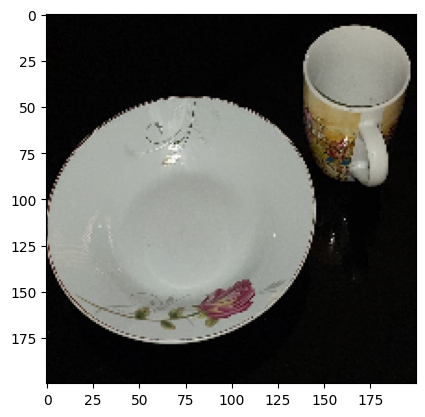

In [ ]:
img = image.load_img('/content/DatasetMultilabel_DiajengGanisSamanthaMurpri_202255202019/Gambar250.jpeg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [ ]:
#Evaluasi Model pada Data Test
loss, auc_score = model.evaluate(X_test, y_test)
print("AUC = ", (auc_score * 100.0), "%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2032 - loss: 0.7662
AUC =  21.111111342906952 %


In [ ]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
              precision    recall  f1-score   support

      piring       0.73      0.27      0.39        60
       gelas       0.50      0.04      0.07        51
       garpu       0.55      0.24      0.33        50
      sendok       1.00      0.06      0.12        65

   micro avg       0.65      0.15      0.24       226
   macro avg       0.69      0.15      0.23       226
weighted avg       0.71      0.15      0.23       226
 samples avg       0.19      0.16      0.17       226

Confusion Matrix for piring:
[[24  6]
 [44 16]]
Confusion Matrix for gelas:
[[37  2]
 [49  2]]
Confusion Matrix for garpu:
[[30 10]
 [38 12]]
Confusion Matrix for sendok:
[[25  0]
 [61  4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
